In [2]:
!nvidia-smi

Mon Jul 28 05:49:09 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   56C    P8             12W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
!pip install autodistill-yolov8 autodistill-detic roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.0/527.0 kB 36.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.9/86.9 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 40.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 113.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 102.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 85.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/

## Installation and Setup

In [4]:
!pip install -q \
  autodistill \
  autodistill-grounded-sam \
  autodistill-yolov8 \
  roboflow \
  supervision==0.24.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.8/46.8 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.2/158.2 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.2/256.2 kB 13.5 MB/s eta 0:00:00


In [5]:
from autodistill.detection import CaptionOntology
from autodistill_yolov8 import YOLOv8
from IPython.display import Image
import os
os.environ['MKL_THREADING_LAYER'] = 'GNU'

## Import Dataset

In [ ]:
# from roboflow import Roboflow
# rf = Roboflow(api_key="0riKtTRvtkzN0qFT5E71")
# project = rf.workspace("ccu-uyhaz").project("plane_detect")
# dataset = project.version(3).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...


In [ ]:
# print(dataset.location)

/content/plane_detect-3


In [ ]:
# import os
# import shutil

# dataset_location = dataset.location
# destination_folder = "/content/plane-detect"

# # Create the destination folder if it doesn't exist
# os.makedirs(destination_folder, exist_ok=True)

# # Copy the contents of the dataset location to the destination folder
# shutil.copytree(dataset_location, destination_folder, dirs_exist_ok=True)

# print(f"Dataset copied to: {destination_folder}")

Dataset copied to: /content/plane-detect


## Initialize Base Model and Autolabel

In [10]:
# # delete the images and lables folders
import shutil
shutil.rmtree('/content/unified_yolo_dataset')

In [6]:
# # create a new folder called images
import os
HOME = os.getcwd()
print(HOME)
# IMAGE_DIR_PATH = f"{HOME}/images"

/content


In [ ]:
# import os
# import shutil
# import random
# from pathlib import Path

# # Define source and destination
# source_dir = Path("/content/plane_detect-3/test/images")
# destination_dir = Path("/content/images")

# # Create destination folder if it doesn't exist
# destination_dir.mkdir(parents=True, exist_ok=True)

# # List all files in the source directory
# all_files = list(source_dir.glob("*"))

# # Calculate 1/5th of the files
# num_to_move = len(all_files) // 5

# # Randomly select 1/5th of the files
# files_to_move = random.sample(all_files, num_to_move)

# # Move selected files
# for file in files_to_move:
#     shutil.move(str(file), destination_dir / file.name)

# print(f"Moved {num_to_move} files from {source_dir} to {destination_dir}")



Moved 29 files from /content/plane_detect-3/test/images to /content/images


In [ ]:
# import os
# HOME = os.getcwd()
# print(HOME)
# OUT_DIR_PATH = f"{HOME}/out/"

/content


In [ ]:
# base_model.label(input_folder=IMAGE_DIR_PATH, output_folder=OUT_DIR_PATH, extension=".jpg")

Labeling /content/images/airplane_187_jpg.rf.e659144531a316c245b2cfb9f4fc3610.jpg:   0%|          | 0/29 [00:00<?, ?it/s]The `device` argument is deprecated and will be removed in v5 of Transformers.
torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.5 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
None of the inputs have requires_grad=True. Gradients will be None
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
Labeling /content/images/boat172_png_jpg.rf.2385195a1cd66f4693380c3ba224b44f.jpg: 100%|██████████| 29/29 [01:17<00:00,  2.67s/it]

Labeled dataset created - ready for distillation.


## Validate Lables usig supervision

In [ ]:
ANNOTATIONS_DIRECTORY_PATH = f"{HOME}/autolabeled_data/4710022261506/train/labels"
IMAGES_DIRECTORY_PATH = f"{HOME}/autolabeled_data/4710022261506/train/images"
DATA_YAML_PATH = f"{HOME}/autolabeled_data/4710022261506/data.yaml"

In [ ]:
import supervision as sv

dataset = sv.DetectionDataset.from_yolo(
    images_directory_path=IMAGES_DIRECTORY_PATH,
    annotations_directory_path=ANNOTATIONS_DIRECTORY_PATH,
    data_yaml_path=DATA_YAML_PATH)

len(dataset)

14

In [ ]:
SAMPLE_SIZE = 10
SAMPLE_GRID_SIZE = (5, 2)  # 5 rows, 2 columns
SAMPLE_PLOT_SIZE = (32, 32)

images is deprecated: `DetectionDataset.images` property is deprecated and will be removed in `supervision-0.26.0`. Iterate with `for path, image, annotation in dataset:` instead.
BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
images is deprecated: `DetectionDataset.images` property is deprecated and will be removed in `supervision-0.26.0`. Iterate with `for path, image, annotation in dataset:` instead.
images is deprecated: `DetectionDataset.images` property is deprecated and will be removed in `supervision-0.26.0`. Iterate with `for path, image, annotation in dataset:` instead.
images is deprecated: `DetectionDataset.images` property is deprecated and will be removed in `supervision-0.26.0`. Iterate with `for path, image, annotation in dataset:` instead.
images is deprecated: `DetectionDataset.images` property is deprecated and will be removed in `supervisio

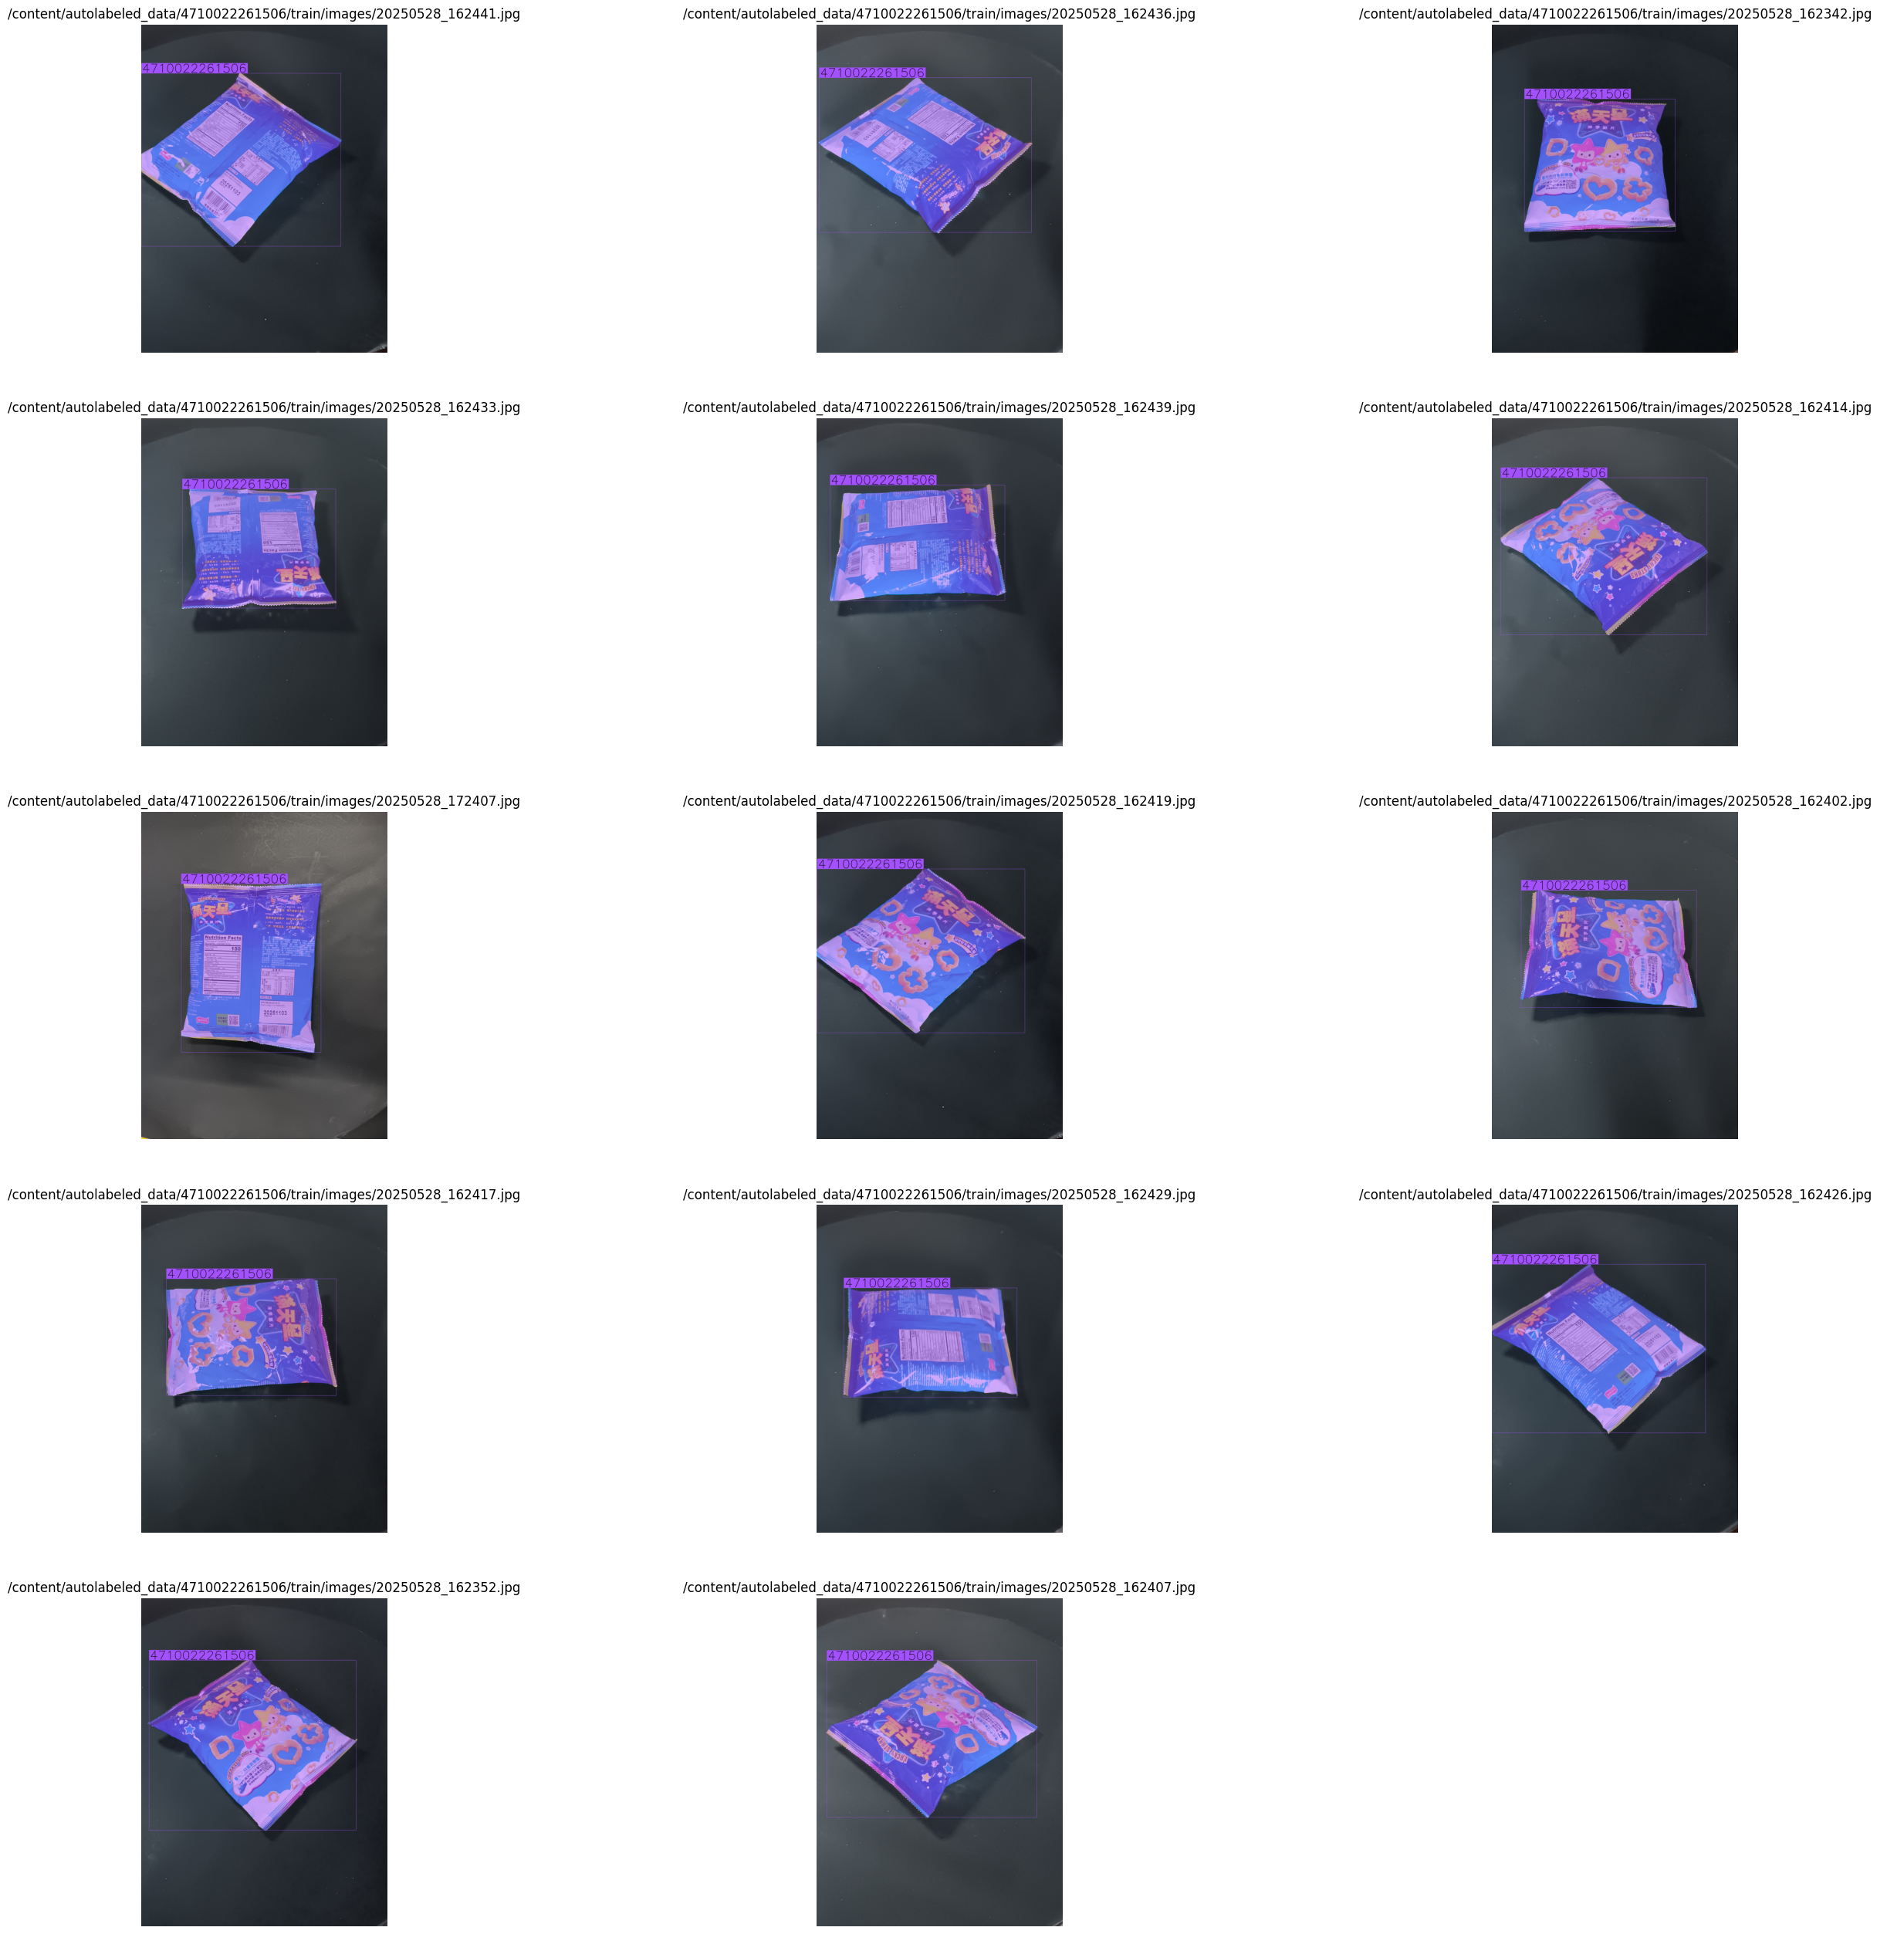

In [ ]:

SAMPLE_SIZE = 15
SAMPLE_GRID_SIZE = (5, 3)  # 5 rows, 2 columns
SAMPLE_PLOT_SIZE = (32, 32)

import supervision as sv

image_names = list(dataset.images.keys())[:SAMPLE_SIZE]

mask_annotator = sv.MaskAnnotator()
box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator(
    text_color=sv.Color.BLACK,
    text_scale=5.0,
    text_thickness=3
)

images = []
for image_name in image_names:
    image = dataset.images[image_name]
    annotations = dataset.annotations[image_name]
    labels = [
        dataset.classes[class_id]
        for class_id
        in annotations.class_id]


    annotated_image = mask_annotator.annotate(
        scene=image.copy(),
        detections=annotations)
    annotated_image = box_annotator.annotate(
        scene=annotated_image,
        detections=annotations,
        )

    annotated_image = label_annotator.annotate(
        scene=annotated_image,
        detections=annotations,
        labels=labels)

    images.append(annotated_image)

sv.plot_images_grid(
    images=images,
    titles=image_names,
    grid_size=SAMPLE_GRID_SIZE,
    size=SAMPLE_PLOT_SIZE)

## For the images from the DRIVE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

folder_path = '/content/drive/MyDrive/Colab Notebooks/GeekLabs/GeekLabs'

folder_names = []
# List all files and folders inside
for item in os.listdir(folder_path):
    item_path = os.path.join(folder_path, item)
    if os.path.isdir(item_path):
        folder_names.append(item)

print("Folder names stored in a list:", folder_names)

Folder names stored in a list: ['4710022261506', '4710098160024', '4710088410436', '4710199011874', '4710022251507', '4710199030172', '4710199112854', '4710088832382', '4710098160222', '4710088410283', '4901335001600', '4710199114339', '4710421071607', '8938553456055', '4901335004731', '4710421073137', '9557062361200', '9557062361194', '4715082800016', '4710543302221', '9557062361224']


In [ ]:
# conert folder_names to array
folder_names = [folder_names[0]]

In [ ]:
folder_names

['4710022261506']

In [ ]:
from autodistill.detection import CaptionOntology
from autodistill_grounded_sam import GroundedSAM
import os

for folder_name in folder_names:
    print(f"Processing folder: {folder_name}")

    # Step 2: Create dynamic ontology
    ontology = CaptionOntology({
        "single grocery item": folder_name
    })

    base_model = GroundedSAM(ontology=ontology)


    # Step 3: Define input path
    input_folder_path = os.path.join('/content/drive/MyDrive/Colab Notebooks/GeekLabs/GeekLabs', folder_name)

    # Step 4: Autolabel images
    # Make sure to adjust the output_folder if you want to save labels in a specific location
    # and handle potential errors during the labeling process.
    try:
        base_model.label(input_folder_path, extension=".jpg", output_folder=f"/content/autolabeled_data/{folder_name}")
        print(f"Autolabeling completed for folder: {folder_name}")
    except Exception as e:
        print(f"Error processing folder {folder_name}: {e}")

print("Autolabeling process finished for all folders.")

Processing folder: 4710022261506
trying to load grounding dino directly
final text_encoder_type: bert-base-uncased


Labeling /content/drive/MyDrive/Colab Notebooks/GeekLabs/GeekLabs/4710022261506/20250528_162441.jpg:   0%|          | 0/18 [00:00<?, ?it/s]The `device` argument is deprecated and will be removed in v5 of Transformers.
torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.5 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
None of the inputs have requires_grad=True. Gradients will be None
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
Labeling /content/drive/MyDrive/Colab Notebooks/GeekLabs/GeekLabs/4710022261506/20250528_162407.jpg: 100%|██████████| 18/18 [01:06<00:00,  3.69s/it]


Labeled dataset created - ready for distillation.
Autolabeling completed for folder: 4710022261506
Autolabeling process finished for all folders.


## Modified Code with Consolidated Labeling and Dataset Creation
1. All labeled data is saved into a single dataset folder.
2. Each image gets labeled with the folder name as the class label.
3. A proper data.yaml file is generated with all folder names as class labels,

In [11]:
from google.colab import drive
drive.mount('/content/drive')
import os
import yaml
import shutil
from autodistill.detection import CaptionOntology
from autodistill_grounded_sam import GroundedSAM

folder_path = '/content/drive/MyDrive/Colab Notebooks/GeekLabs/GeekLabs'
output_base_path = '/content/unified_yolo_dataset'

os.makedirs(f"{output_base_path}/images", exist_ok=True)
os.makedirs(f"{output_base_path}/labels", exist_ok=True)

folder_names = []
for item in os.listdir(folder_path):
    item_path = os.path.join(folder_path, item)
    if os.path.isdir(item_path):
        folder_names.append(item)

print("Classes found:", folder_names)

class_mapping = {folder_name: idx for idx, folder_name in enumerate(folder_names)}
print("Class mapping:", class_mapping)

all_processed_images = []

for folder_name in folder_names:
    print(f"\nProcessing folder: {folder_name} (Class ID: {class_mapping[folder_name]})")

    ontology = CaptionOntology({
        "a single object centered in the image": folder_name
    })

    base_model = GroundedSAM(ontology=ontology)

    # Define input and temporary output paths
    input_folder_path = os.path.join(folder_path, folder_name)
    temp_output_path = f"/content/temp_{folder_name}"

    try:
        base_model.label(input_folder_path, extension=".jpg", output_folder=temp_output_path)

        for split_folder in ['train', 'valid']:
            temp_split_path = os.path.join(temp_output_path, split_folder)

            if os.path.exists(temp_split_path):
                temp_images_path = os.path.join(temp_split_path, "images")
                temp_labels_path = os.path.join(temp_split_path, "labels")

                # Process images
                if os.path.exists(temp_images_path):
                    for img_file in os.listdir(temp_images_path):
                        if img_file.endswith('.jpg'):
                            src_img = os.path.join(temp_images_path, img_file)
                            dst_img = os.path.join(f"{output_base_path}/images", f"{folder_name}_{split_folder}_{img_file}")
                            shutil.copy2(src_img, dst_img)
                            all_processed_images.append(f"{folder_name}_{split_folder}_{img_file}")

                # Process labels with correct class IDs
                if os.path.exists(temp_labels_path):
                    for label_file in os.listdir(temp_labels_path):
                        if label_file.endswith('.txt'):
                            src_label = os.path.join(temp_labels_path, label_file)
                            dst_label = os.path.join(f"{output_base_path}/labels", f"{folder_name}_{split_folder}_{label_file}")

                            # Read original label file and update class IDs
                            with open(src_label, 'r') as f:
                                lines = f.readlines()

                            updated_lines = []
                            for line in lines:
                                parts = line.strip().split()
                                if parts:
                                    parts[0] = str(class_mapping[folder_name])
                                    updated_lines.append(' '.join(parts) + '\n')

                            with open(dst_label, 'w') as f:
                                f.writelines(updated_lines)

        # Clean up temporary folder
        if os.path.exists(temp_output_path):
            shutil.rmtree(temp_output_path)

        print(f"✓ Completed processing {folder_name}")

    except Exception as e:
        print(f"✗ Error processing folder {folder_name}: {e}")
        # Clean up temporary folder in case of error
        if os.path.exists(temp_output_path):
            shutil.rmtree(temp_output_path)

# Create data.yaml file for YOLO training
data_yaml = {
    'train': f"{output_base_path}/images",
    'val': f"{output_base_path}/images",  # You might want to split this later
    'nc': len(folder_names),  # number of classes
    'names': folder_names  # class names
}

yaml_path = os.path.join(output_base_path, 'data.yaml')
with open(yaml_path, 'w') as f:
    yaml.dump(data_yaml, f, default_flow_style=False)

print(f"\n🎉 Unified dataset created successfully!")
print(f"📁 Dataset location: {output_base_path}")
print(f"📊 Total classes: {len(folder_names)}")
print(f"🖼️ Total images processed: {len(all_processed_images)}")
print(f"📄 data.yaml created with all classes")
print(f"\nClasses in dataset: {folder_names}")

# Display dataset structure
print(f"\nDataset structure:")
print(f"📁 {output_base_path}/")
print(f"  ├── 📁 images/ ({len(all_processed_images)} images)")
print(f"  ├── 📁 labels/ ({len(all_processed_images)} label files)")
print(f"  └── 📄 data.yaml")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Classes found: ['4710022261506', '4710098160024', '4710088410436', '4710199011874', '4710022251507', '4710199030172', '4710199112854', '4710088832382', '4710098160222', '4710088410283', '4901335001600', '4710199114339', '4710421071607', '8938553456055', '4901335004731', '4710421073137', '9557062361200', '9557062361194', '4715082800016', '4710543302221', '9557062361224']
Class mapping: {'4710022261506': 0, '4710098160024': 1, '4710088410436': 2, '4710199011874': 3, '4710022251507': 4, '4710199030172': 5, '4710199112854': 6, '4710088832382': 7, '4710098160222': 8, '4710088410283': 9, '4901335001600': 10, '4710199114339': 11, '4710421071607': 12, '8938553456055': 13, '4901335004731': 14, '4710421073137': 15, '9557062361200': 16, '9557062361194': 17, '4715082800016': 18, '4710543302221': 19, '9557062361224': 20}

Processing folder: 4710022261506 (Class ID: 0)
try

Labeling /content/drive/MyDrive/Colab Notebooks/GeekLabs/GeekLabs/4710022261506/20250528_162407.jpg: 100%|██████████| 18/18 [00:52<00:00,  2.91s/it]


Labeled dataset created - ready for distillation.
✓ Completed processing 4710022261506

Processing folder: 4710098160024 (Class ID: 1)
trying to load grounding dino directly
final text_encoder_type: bert-base-uncased


Labeling /content/drive/MyDrive/Colab Notebooks/GeekLabs/GeekLabs/4710098160024/20250528_172125.jpg: 100%|██████████| 18/18 [00:51<00:00,  2.87s/it]


Labeled dataset created - ready for distillation.
✓ Completed processing 4710098160024

Processing folder: 4710088410436 (Class ID: 2)
trying to load grounding dino directly
final text_encoder_type: bert-base-uncased


Labeling /content/drive/MyDrive/Colab Notebooks/GeekLabs/GeekLabs/4710088410436/20250528_164155.jpg: 100%|██████████| 18/18 [00:51<00:00,  2.88s/it]


Labeled dataset created - ready for distillation.
✓ Completed processing 4710088410436

Processing folder: 4710199011874 (Class ID: 3)
trying to load grounding dino directly
final text_encoder_type: bert-base-uncased


Labeling /content/drive/MyDrive/Colab Notebooks/GeekLabs/GeekLabs/4710199011874/20250528_162754.jpg: 100%|██████████| 18/18 [00:51<00:00,  2.86s/it]


Labeled dataset created - ready for distillation.
✓ Completed processing 4710199011874

Processing folder: 4710022251507 (Class ID: 4)
trying to load grounding dino directly
final text_encoder_type: bert-base-uncased


Labeling /content/drive/MyDrive/Colab Notebooks/GeekLabs/GeekLabs/4710022251507/20250528_163724.jpg: 100%|██████████| 18/18 [00:51<00:00,  2.88s/it]


Labeled dataset created - ready for distillation.
✓ Completed processing 4710022251507

Processing folder: 4710199030172 (Class ID: 5)
trying to load grounding dino directly
final text_encoder_type: bert-base-uncased


Labeling /content/drive/MyDrive/Colab Notebooks/GeekLabs/GeekLabs/4710199030172/20250528_164318.jpg: 100%|██████████| 18/18 [00:51<00:00,  2.87s/it]


Labeled dataset created - ready for distillation.
✓ Completed processing 4710199030172

Processing folder: 4710199112854 (Class ID: 6)
trying to load grounding dino directly
final text_encoder_type: bert-base-uncased


Labeling /content/drive/MyDrive/Colab Notebooks/GeekLabs/GeekLabs/4710199112854/20250528_164723.jpg: 100%|██████████| 18/18 [00:51<00:00,  2.87s/it]


Labeled dataset created - ready for distillation.
✓ Completed processing 4710199112854

Processing folder: 4710088832382 (Class ID: 7)
trying to load grounding dino directly
final text_encoder_type: bert-base-uncased


Labeling /content/drive/MyDrive/Colab Notebooks/GeekLabs/GeekLabs/4710088832382/20250528_164831.jpg: 100%|██████████| 18/18 [00:52<00:00,  2.90s/it]


Labeled dataset created - ready for distillation.
✓ Completed processing 4710088832382

Processing folder: 4710098160222 (Class ID: 8)
trying to load grounding dino directly
final text_encoder_type: bert-base-uncased


Labeling /content/drive/MyDrive/Colab Notebooks/GeekLabs/GeekLabs/4710098160222/20250528_162906.jpg: 100%|██████████| 18/18 [00:51<00:00,  2.88s/it]


Labeled dataset created - ready for distillation.
✓ Completed processing 4710098160222

Processing folder: 4710088410283 (Class ID: 9)
trying to load grounding dino directly
final text_encoder_type: bert-base-uncased


Labeling /content/drive/MyDrive/Colab Notebooks/GeekLabs/GeekLabs/4710088410283/20250528_171741.jpg: 100%|██████████| 17/17 [00:49<00:00,  2.89s/it]


Labeled dataset created - ready for distillation.
✓ Completed processing 4710088410283

Processing folder: 4901335001600 (Class ID: 10)
trying to load grounding dino directly
final text_encoder_type: bert-base-uncased


Labeling /content/drive/MyDrive/Colab Notebooks/GeekLabs/GeekLabs/4901335001600/20250528_175348.jpg: 100%|██████████| 18/18 [00:52<00:00,  2.90s/it]


Labeled dataset created - ready for distillation.
✓ Completed processing 4901335001600

Processing folder: 4710199114339 (Class ID: 11)
trying to load grounding dino directly
final text_encoder_type: bert-base-uncased


Labeling /content/drive/MyDrive/Colab Notebooks/GeekLabs/GeekLabs/4710199114339/20250528_164914.jpg: 100%|██████████| 18/18 [00:52<00:00,  2.89s/it]


Labeled dataset created - ready for distillation.
✓ Completed processing 4710199114339

Processing folder: 4710421071607 (Class ID: 12)
trying to load grounding dino directly
final text_encoder_type: bert-base-uncased


Labeling /content/drive/MyDrive/Colab Notebooks/GeekLabs/GeekLabs/4710421071607/20250528_163340.jpg: 100%|██████████| 18/18 [00:51<00:00,  2.89s/it]


Labeled dataset created - ready for distillation.
✓ Completed processing 4710421071607

Processing folder: 8938553456055 (Class ID: 13)
trying to load grounding dino directly
final text_encoder_type: bert-base-uncased


Labeling /content/drive/MyDrive/Colab Notebooks/GeekLabs/GeekLabs/8938553456055/20250528_164514.jpg: 100%|██████████| 10/10 [00:28<00:00,  2.87s/it]


Labeled dataset created - ready for distillation.
✓ Completed processing 8938553456055

Processing folder: 4901335004731 (Class ID: 14)
trying to load grounding dino directly
final text_encoder_type: bert-base-uncased


Labeling /content/drive/MyDrive/Colab Notebooks/GeekLabs/GeekLabs/4901335004731/20250528_162636.jpg: 100%|██████████| 19/19 [00:54<00:00,  2.89s/it]


Labeled dataset created - ready for distillation.
✓ Completed processing 4901335004731

Processing folder: 4710421073137 (Class ID: 15)
trying to load grounding dino directly
final text_encoder_type: bert-base-uncased


Labeling /content/drive/MyDrive/Colab Notebooks/GeekLabs/GeekLabs/4710421073137/20250528_165248.jpg: 100%|██████████| 18/18 [00:52<00:00,  2.91s/it]


Labeled dataset created - ready for distillation.
✓ Completed processing 4710421073137

Processing folder: 9557062361200 (Class ID: 16)
trying to load grounding dino directly
final text_encoder_type: bert-base-uncased


Labeling /content/drive/MyDrive/Colab Notebooks/GeekLabs/GeekLabs/9557062361200/20250528_165957.jpg: 100%|██████████| 18/18 [00:52<00:00,  2.90s/it]


Labeled dataset created - ready for distillation.
✓ Completed processing 9557062361200

Processing folder: 9557062361194 (Class ID: 17)
trying to load grounding dino directly
final text_encoder_type: bert-base-uncased


Labeling /content/drive/MyDrive/Colab Notebooks/GeekLabs/GeekLabs/9557062361194/20250528_170541.jpg: 100%|██████████| 15/15 [00:43<00:00,  2.89s/it]


Labeled dataset created - ready for distillation.
✓ Completed processing 9557062361194

Processing folder: 4715082800016 (Class ID: 18)
trying to load grounding dino directly
final text_encoder_type: bert-base-uncased


Labeling /content/drive/MyDrive/Colab Notebooks/GeekLabs/GeekLabs/4715082800016/20250528_162100.jpg: 100%|██████████| 18/18 [00:52<00:00,  2.90s/it]


Labeled dataset created - ready for distillation.
✓ Completed processing 4715082800016

Processing folder: 4710543302221 (Class ID: 19)
trying to load grounding dino directly
final text_encoder_type: bert-base-uncased


Labeling /content/drive/MyDrive/Colab Notebooks/GeekLabs/GeekLabs/4710543302221/20250528_175459.jpg: 100%|██████████| 18/18 [00:52<00:00,  2.89s/it]


Labeled dataset created - ready for distillation.
✓ Completed processing 4710543302221

Processing folder: 9557062361224 (Class ID: 20)
trying to load grounding dino directly
final text_encoder_type: bert-base-uncased


Labeling /content/drive/MyDrive/Colab Notebooks/GeekLabs/GeekLabs/9557062361224/20250528_170403.jpg: 100%|██████████| 17/17 [00:49<00:00,  2.89s/it]


Labeled dataset created - ready for distillation.
✓ Completed processing 9557062361224

🎉 Unified dataset created successfully!
📁 Dataset location: /content/unified_yolo_dataset
📊 Total classes: 21
🖼️ Total images processed: 366
📄 data.yaml created with all classes

Classes in dataset: ['4710022261506', '4710098160024', '4710088410436', '4710199011874', '4710022251507', '4710199030172', '4710199112854', '4710088832382', '4710098160222', '4710088410283', '4901335001600', '4710199114339', '4710421071607', '8938553456055', '4901335004731', '4710421073137', '9557062361200', '9557062361194', '4715082800016', '4710543302221', '9557062361224']

Dataset structure:
📁 /content/unified_yolo_dataset/
  ├── 📁 images/ (366 images)
  ├── 📁 labels/ (366 label files)
  └── 📄 data.yaml


In [17]:
!pip install ultralytics --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 55.5 MB/s eta 0:00:00
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.0.81
    Uninstalling ultralytics-8.0.81:
      Successfully uninstalled ultralytics-8.0.81
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
autodistill-yolov8 0.1.4 requires ultralytics==8.0.81, but you have ultralytics 8.3.170 which is incompatible.


In [3]:
from ultralytics import YOLO
import torch
import os


target_model = YOLO("yolov8n")

target_model.train(
    data="/content/unified_yolo_dataset/data.yaml",  # Path to our data.yaml file
    epochs=10,
    imgsz=640,
    batch=16,
    patience=50,
    save=True,
    device=0
)

Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/unified_yolo_dataset/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=50, perspective=0.0, plots=True, pose=12.0, pr

train: Scanning /content/unified_yolo_dataset/labels.cache... 366 images, 0 backgrounds, 0 corrupt: 100%|██████████| 366/366 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.4±0.9 ms, read: 1594.2±1880.5 MB/s, size: 1435.8 KB)


val: Scanning /content/unified_yolo_dataset/labels.cache... 366 images, 0 backgrounds, 0 corrupt: 100%|██████████| 366/366 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.0004, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      2.55G     0.5028       4.65      1.071         14        640: 100%|██████████| 23/23 [00:49<00:00,  2.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:28<00:00,  2.41s/it]

                   all        366        375          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      2.56G     0.3337      4.117     0.9185         14        640: 100%|██████████| 23/23 [00:38<00:00,  1.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:29<00:00,  2.45s/it]


                   all        366        375     0.0621      0.855       0.18      0.171

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      2.58G     0.3427      3.822     0.9146         14        640: 100%|██████████| 23/23 [00:40<00:00,  1.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:29<00:00,  2.43s/it]


                   all        366        375     0.0452       0.98      0.314      0.306

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      2.58G     0.3403      3.454     0.9143         14        640: 100%|██████████| 23/23 [00:39<00:00,  1.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:28<00:00,  2.36s/it]

                   all        366        375      0.558      0.481      0.476      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10       2.6G     0.3189      3.184     0.8931         14        640: 100%|██████████| 23/23 [00:41<00:00,  1.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:30<00:00,  2.57s/it]


                   all        366        375       0.51      0.588      0.561       0.55

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      2.62G     0.3009      2.966     0.8898         15        640: 100%|██████████| 23/23 [00:40<00:00,  1.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:27<00:00,  2.30s/it]


                   all        366        375      0.489      0.728      0.665      0.648

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      2.63G     0.2777      2.667     0.8739         14        640: 100%|██████████| 23/23 [00:40<00:00,  1.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:29<00:00,  2.47s/it]


                   all        366        375      0.638      0.783      0.772      0.759

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      2.65G     0.2622      2.501      0.855         15        640: 100%|██████████| 23/23 [00:40<00:00,  1.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:28<00:00,  2.38s/it]

                   all        366        375      0.682      0.828      0.828      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      2.67G     0.2486      2.382     0.8359         14        640: 100%|██████████| 23/23 [00:38<00:00,  1.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:28<00:00,  2.40s/it]


                   all        366        375      0.745      0.845      0.849       0.84

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      2.69G     0.2315       2.24     0.8369         14        640: 100%|██████████| 23/23 [00:44<00:00,  1.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:28<00:00,  2.35s/it]

                   all        366        375      0.755       0.86      0.863      0.853



10 epochs completed in 0.200 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.2MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,009,743 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:37<00:00,  3.16s/it]


                   all        366        375      0.756      0.856      0.863      0.854
         4710022261506         18         18      0.591          1      0.908      0.908
         4710098160024         18         18      0.699      0.944      0.976      0.976
         4710088410436         18         23      0.744      0.506      0.704      0.683
         4710199011874         18         18          1      0.823      0.986       0.98
         4710022251507         18         18      0.614      0.883      0.675      0.675
         4710199030172         18         18      0.836      0.889      0.953      0.943
         4710199112854         18         18      0.885      0.853      0.904      0.904
         4710088832382         18         18      0.816      0.944      0.966      0.966
         4710098160222         18         18      0.718          1      0.871      0.871
         4710088410283         17         19      0.505      0.645      0.569      0.564
         490133500160

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ed4a14dca50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0

## Visualize the Results

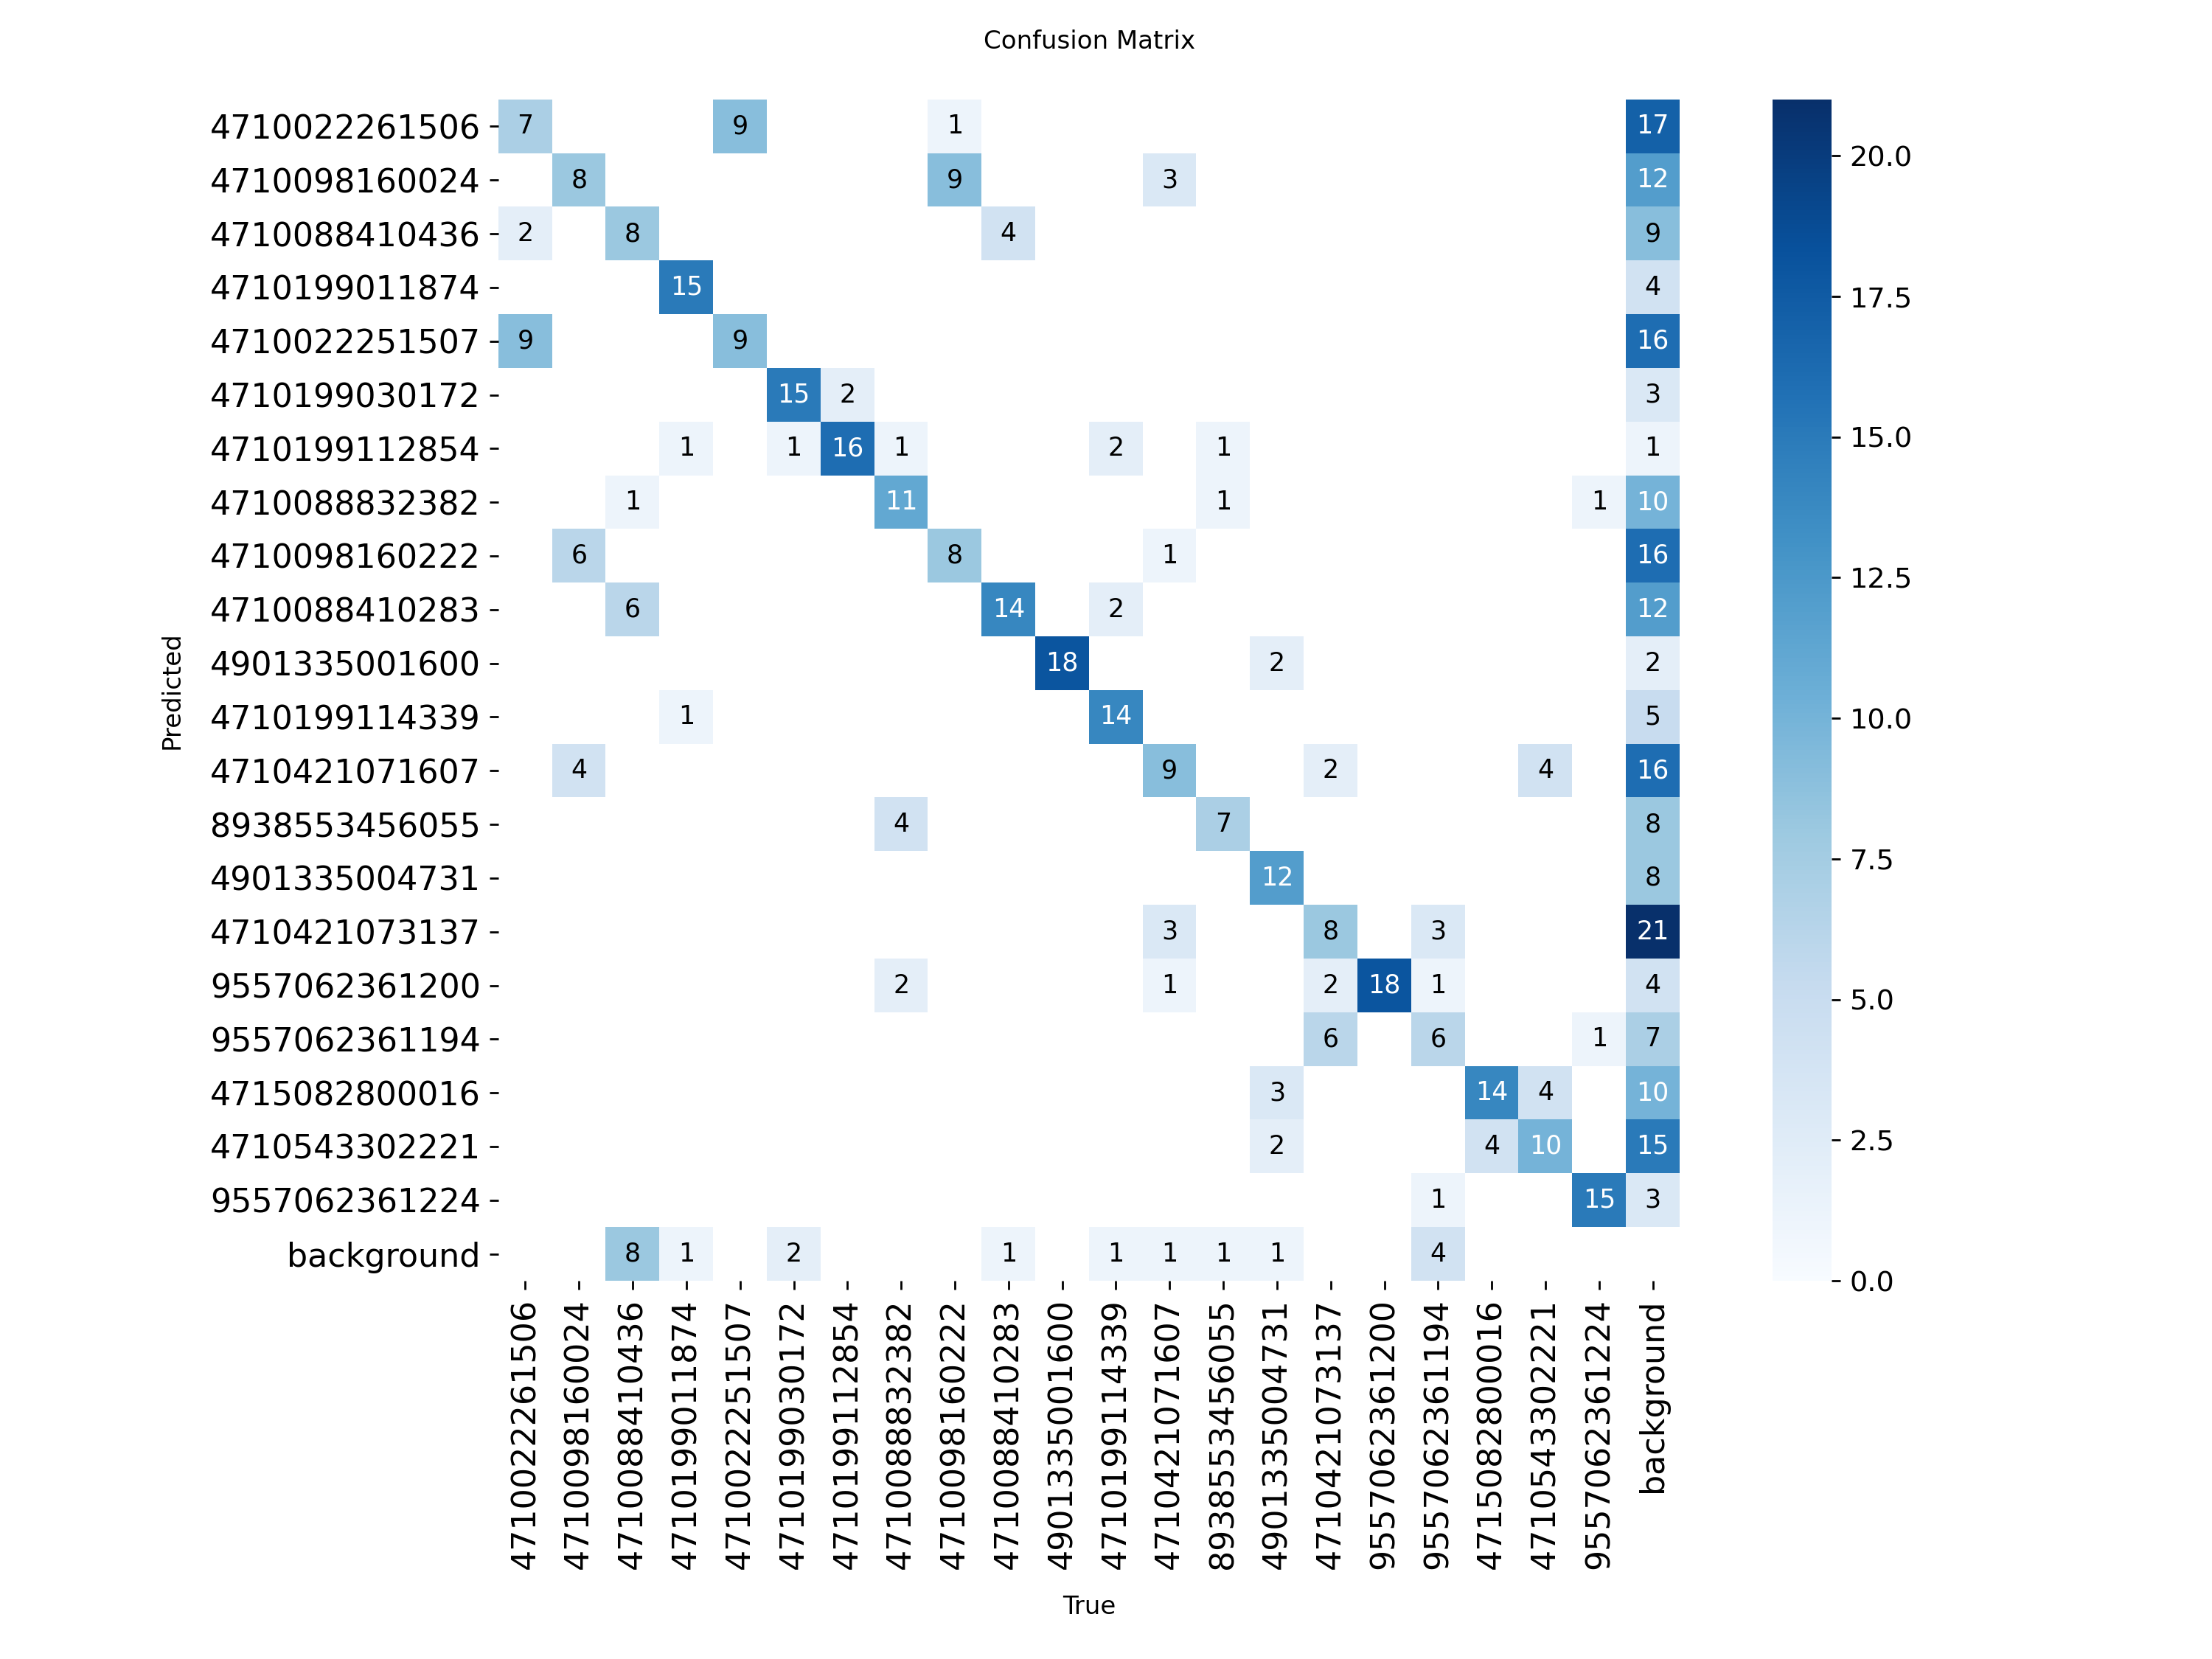

In [7]:
from IPython.display import Image

Image(filename='/content/runs/detect/train2/confusion_matrix.png', width=600)

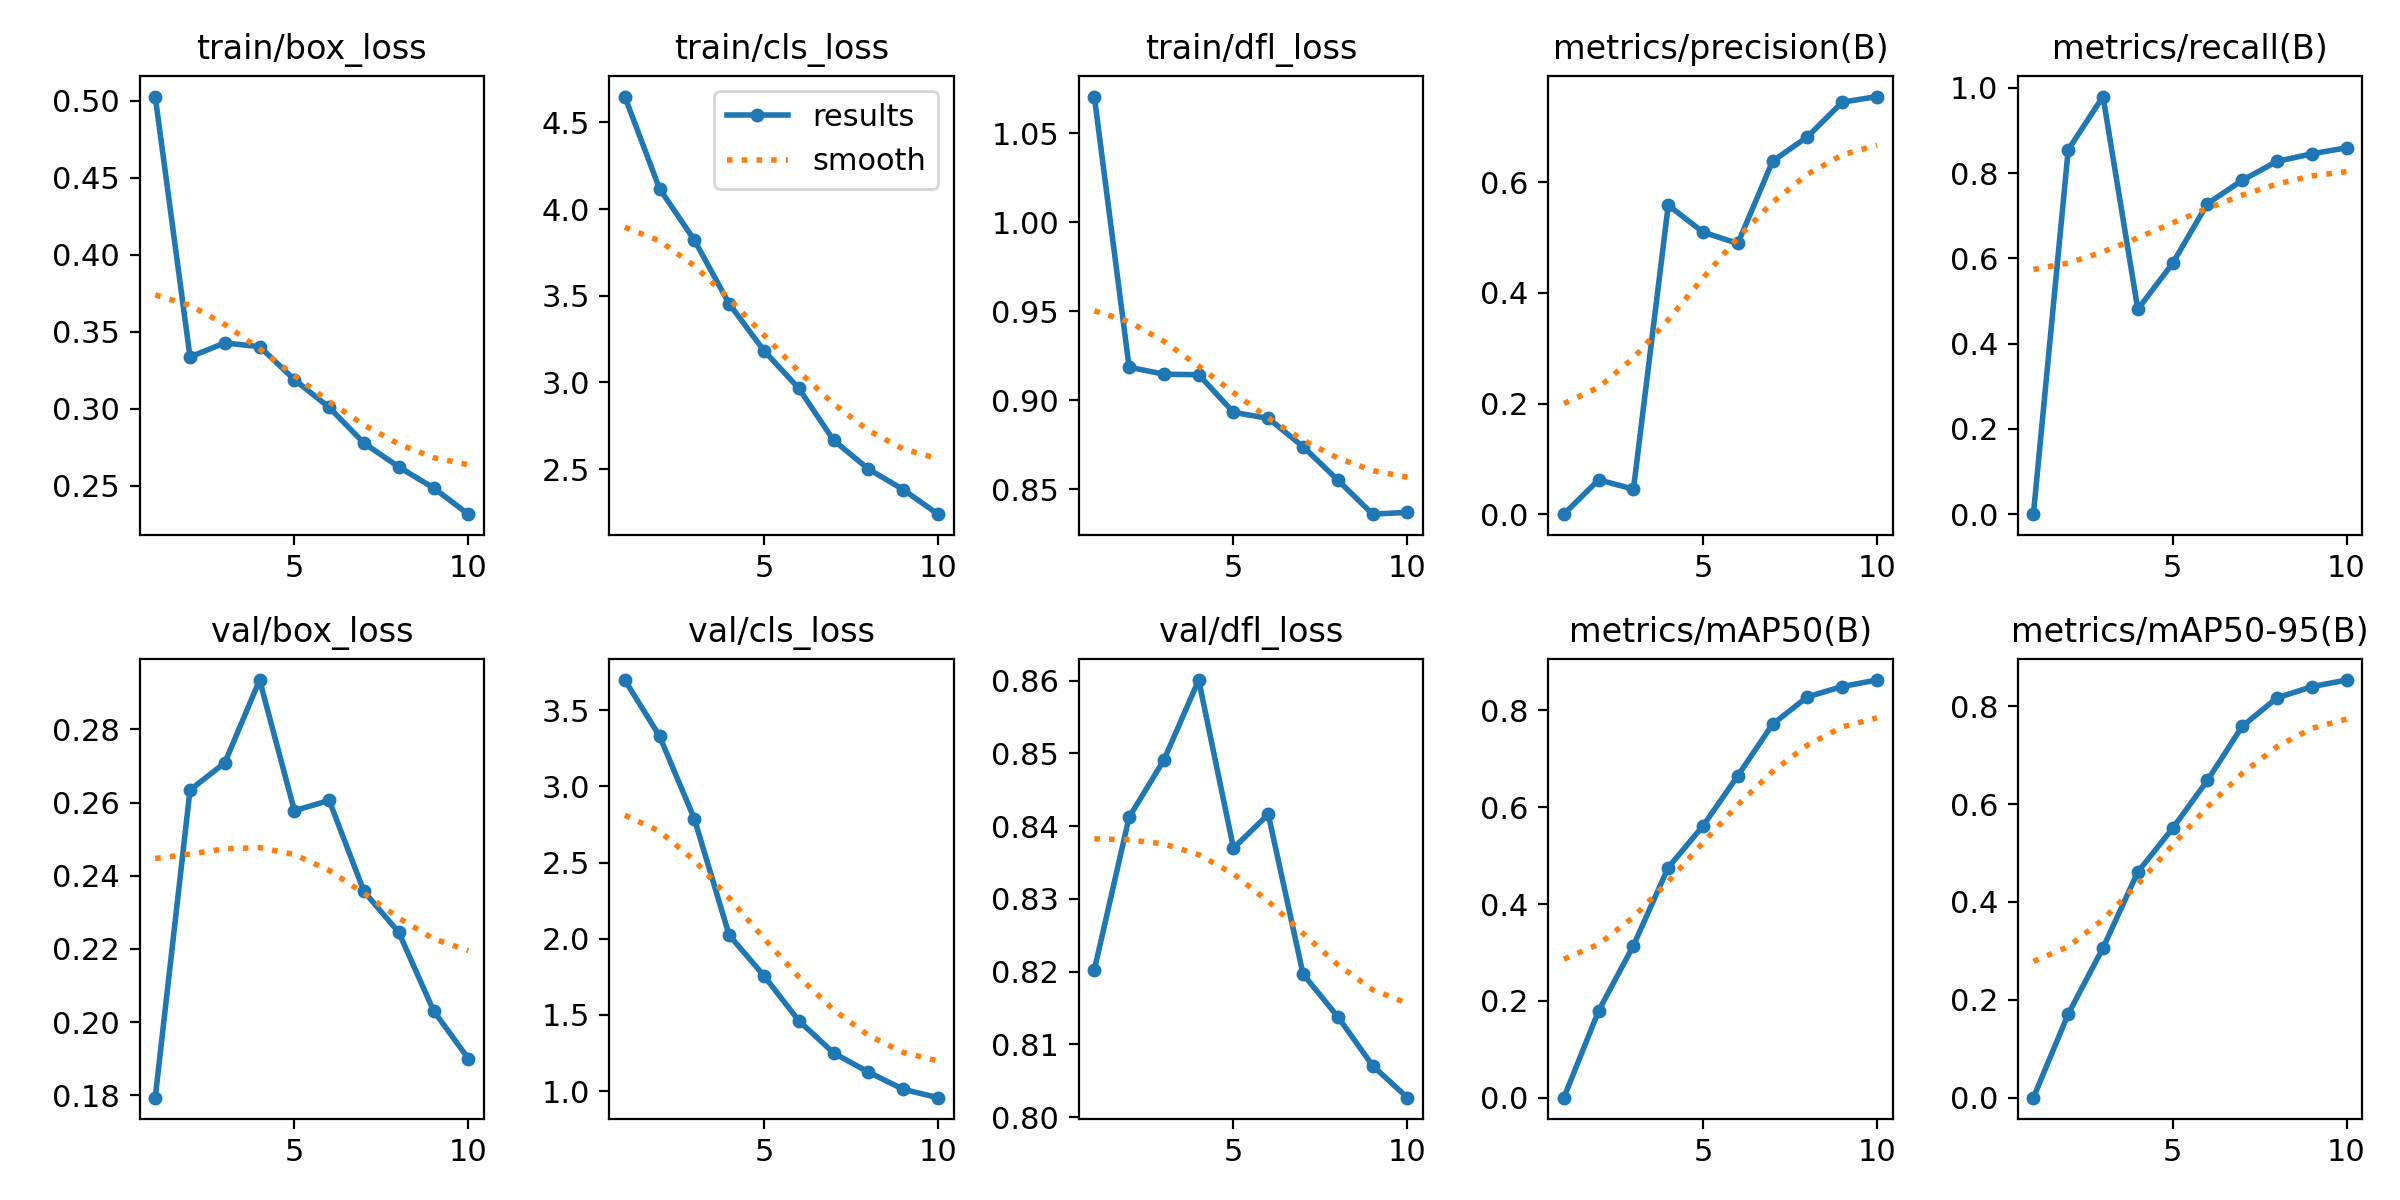

In [8]:
Image(filename='/content/runs/detect/train2/results.png', width=600)

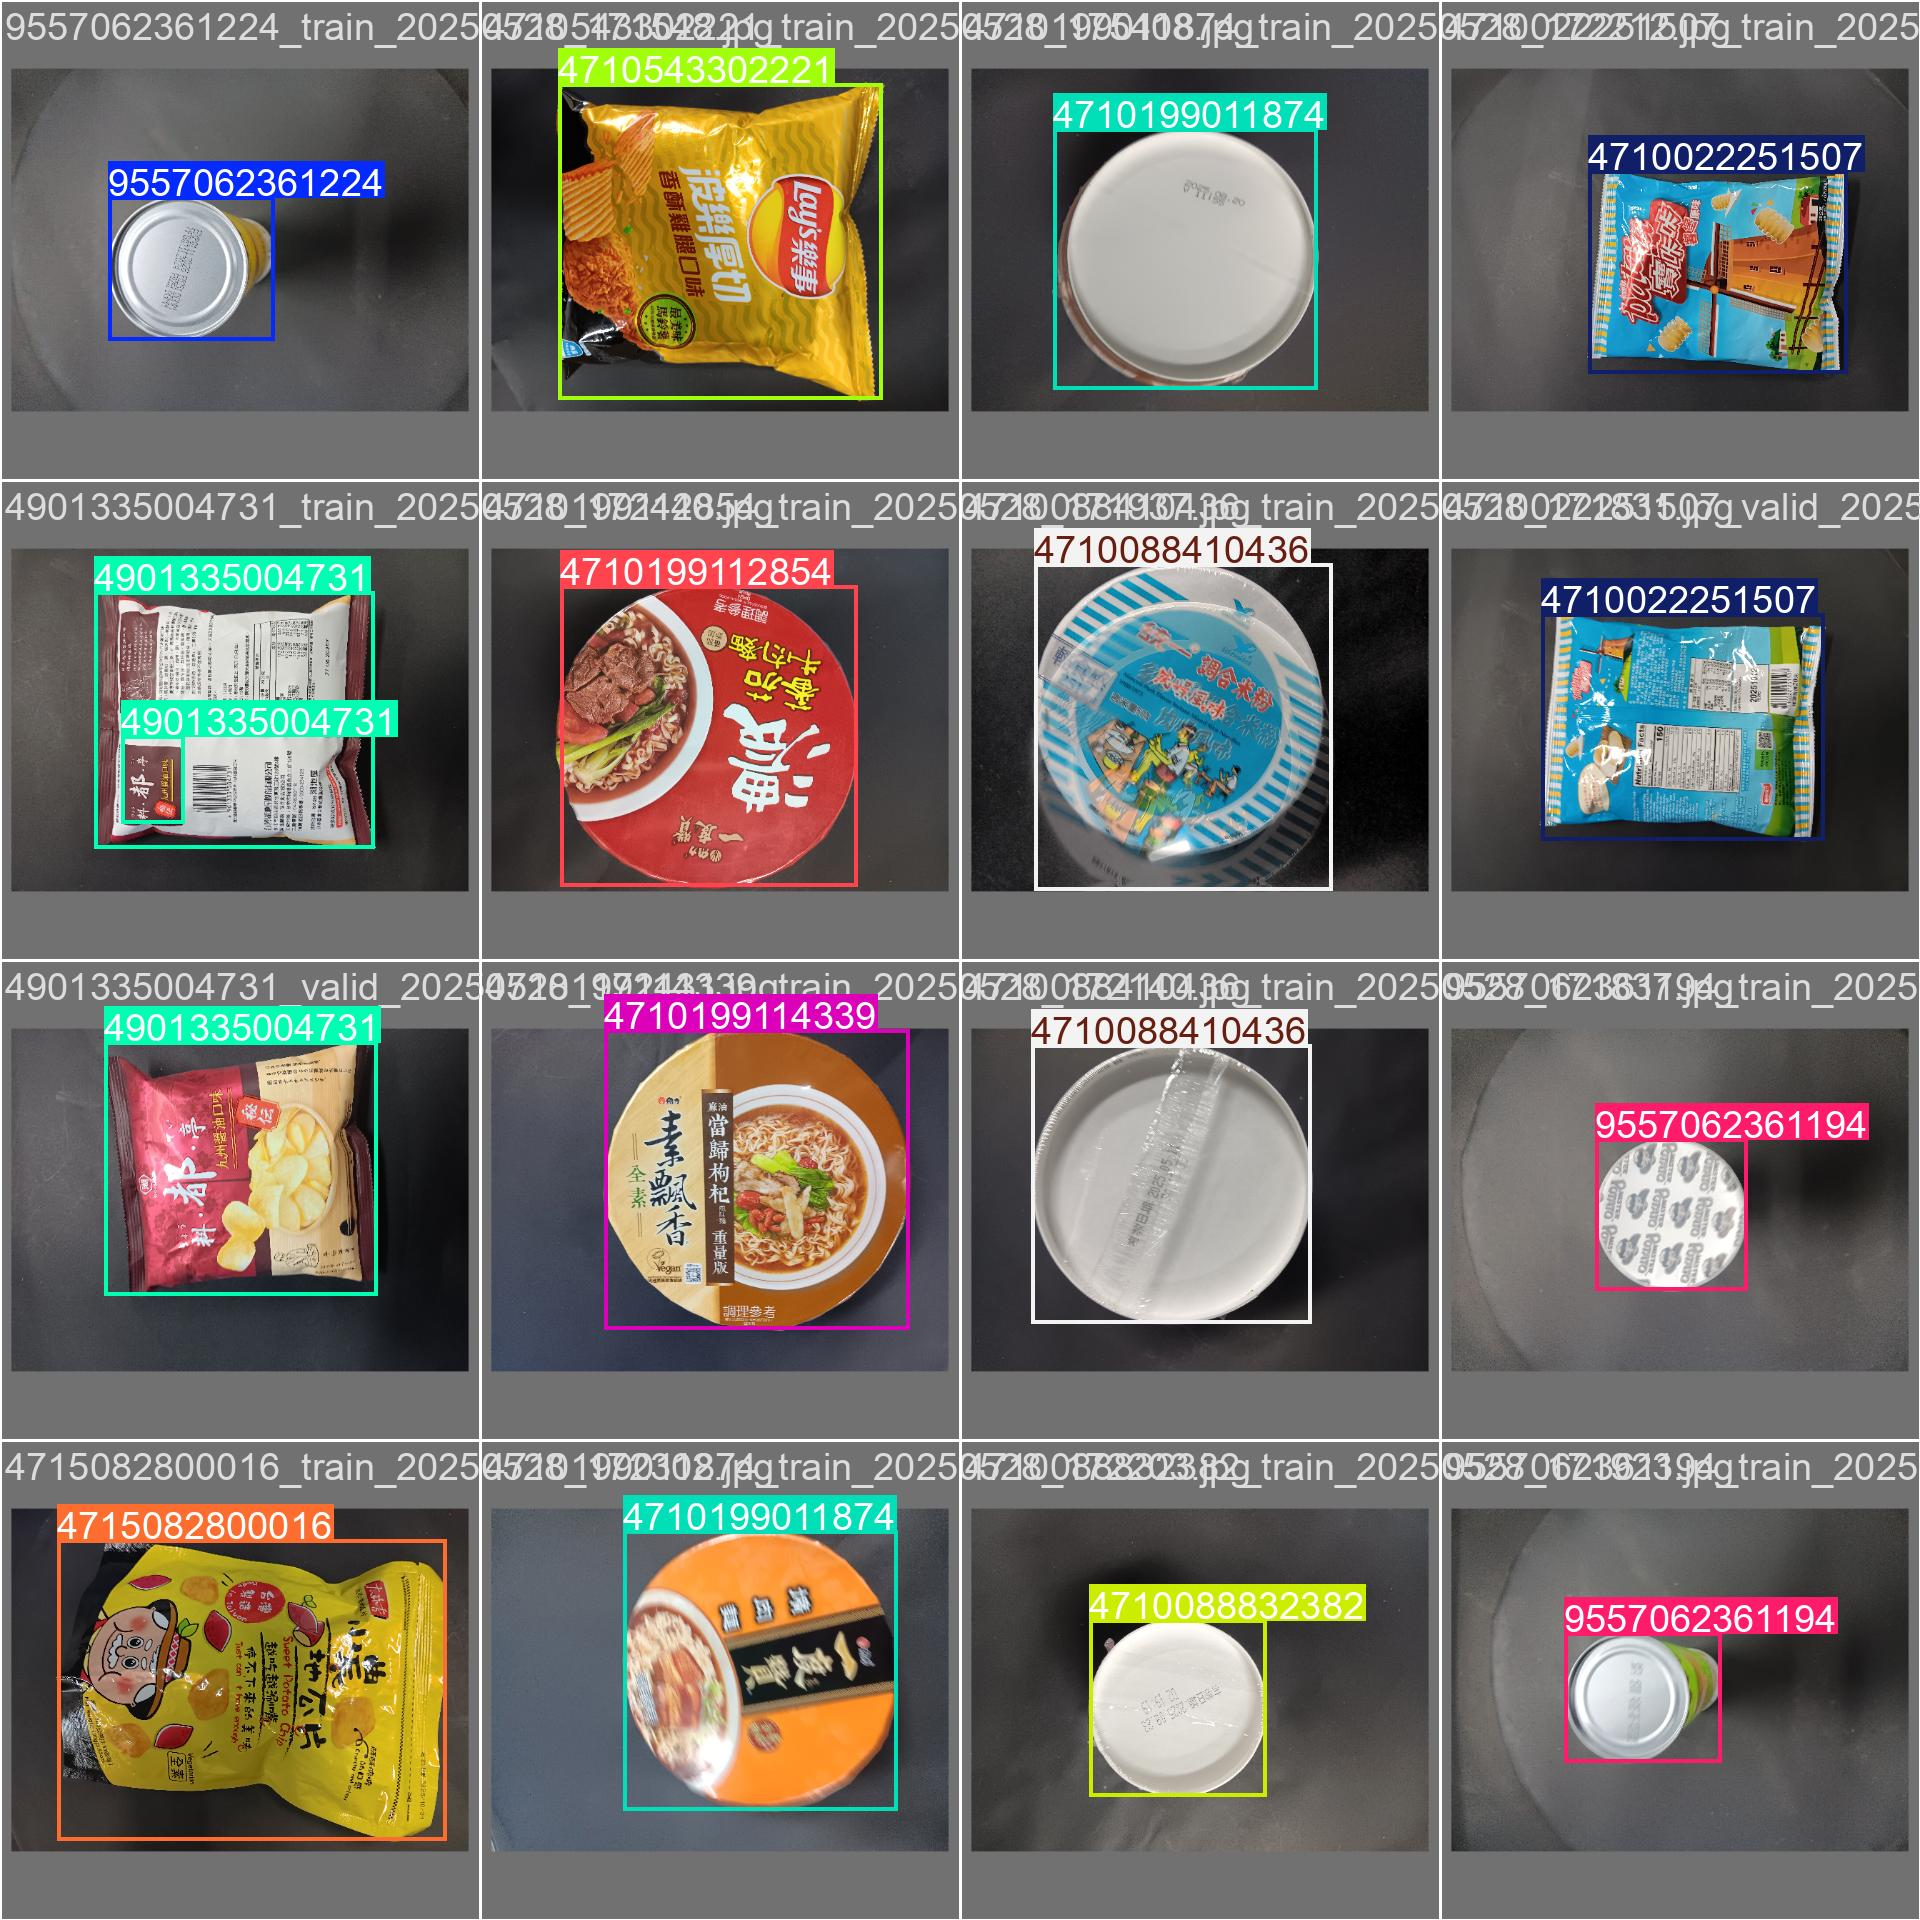

In [11]:
Image(filename='/content/runs/detect/train2/val_batch0_labels.jpg', width=600)

## 🏆 Congratulations

### Learning Resources

Roboflow has produced many resources that you may find interesting as you advance your knowledge of computer vision:

- [Roboflow Notebooks](https://github.com/roboflow/notebooks): A repository of over 20 notebooks that walk through how to train custom models with a range of model types, from YOLOv7 to SegFormer.
- [Roboflow YouTube](https://www.youtube.com/c/Roboflow): Our library of videos featuring deep dives into the latest in computer vision, detailed tutorials that accompany our notebooks, and more.
- [Roboflow Discuss](https://discuss.roboflow.com/): Have a question about how to do something on Roboflow? Ask your question on our discussion forum.
- [Roboflow Models](https://roboflow.com): Learn about state-of-the-art models and their performance. Find links and tutorials to guide your learning.

### Convert data formats

Roboflow provides free utilities to convert data between dozens of popular computer vision formats. Check out [Roboflow Formats](https://roboflow.com/formats) to find tutorials on how to convert data between formats in a few clicks.

### Connect computer vision to your project logic

[Roboflow Templates](https://roboflow.com/templates) is a public gallery of code snippets that you can use to connect computer vision to your project logic. Code snippets range from sending emails after inference to measuring object distance between detections.